In [3]:
# Import libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the files and preprocess the file
f_data = pd.read_csv("penguins.csv")

In [5]:
print(f_data)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [6]:
# Determine the sum of missing entries
m_sum = f_data.isnull().sum()
print("Sum of missing entries from each column:")
print(m_sum)

Sum of missing entries from each column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [7]:
# Missing value fill up in each column
f_data = f_data.fillna(f_data.mode().iloc[0])
print(f_data)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen            41.1           17.0              190.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

In [8]:
# Showing statistics for the numeric column
print(f_data.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      344.000000     344.000000         344.000000   344.000000   
mean        43.905523      17.150291         200.851744  4199.418605   
std          5.447882       1.969061          14.045266   800.197923   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.275000      15.600000         190.000000  3550.000000   
50%         44.250000      17.300000         197.000000  4025.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [9]:
# Presenting first 10 rows 
print(f_data.head(10))

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            41.1           17.0              190.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3       3800.0    male  2007  
4       3450.0  female  2007  

In [10]:
#Dimension of data r*c
n_rows, n_columns = f_data.shape
print(f"Number of rows: {n_rows}, Number of columns: {n_columns}")

Number of rows: 344, Number of columns: 8


In [11]:
# Presenting the value counts in "Island" column 
print(f_data['island'].value_counts())

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


In [12]:
# Dataset information 
data_info = f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [13]:
# Columns converted to categorical
categorical_columns = ['species', 'island', 'sex']
f_data[categorical_columns] = f_data[categorical_columns].astype('category')

In [14]:
# Categorical

sex = {'male': 0, 'female': 1}
island = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
species = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}

f_data['sex'] = f_data['sex'].map(sex)
f_data['island'] = f_data['island'].map(island)
f_data['species'] = f_data['species'].map(species)

In [15]:
print(f_data.species)

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: category
Categories (3, int64): [0, 2, 1]


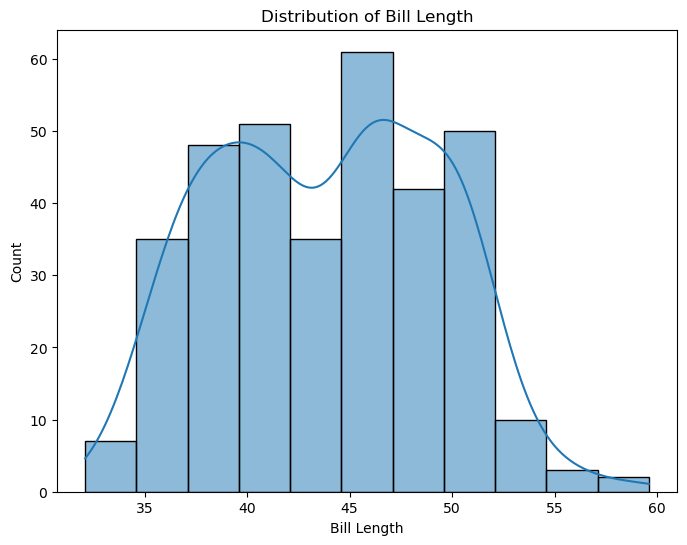

In [16]:
# Presenting bill length disribution
plt.figure(figsize=(8, 6))
sns.histplot(f_data['bill_length_mm'], kde=True)
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length')
plt.ylabel('Count')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


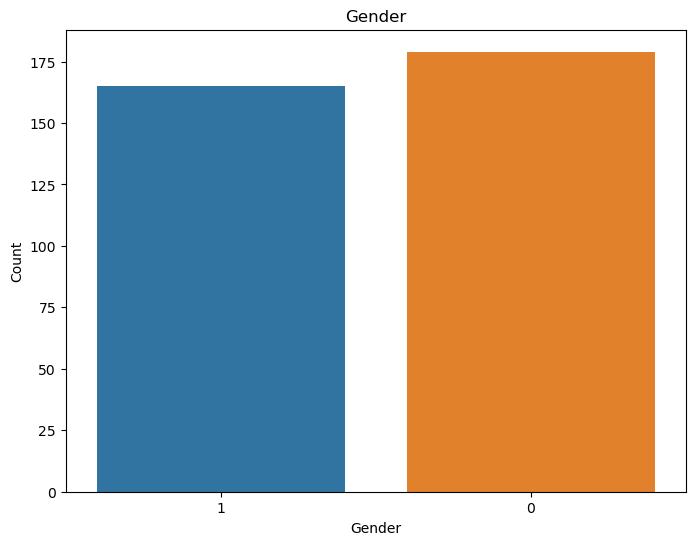

In [17]:
# Presenting bar plot for spices
plt.figure(figsize=(8, 6))
sns.countplot(f_data['sex'])
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

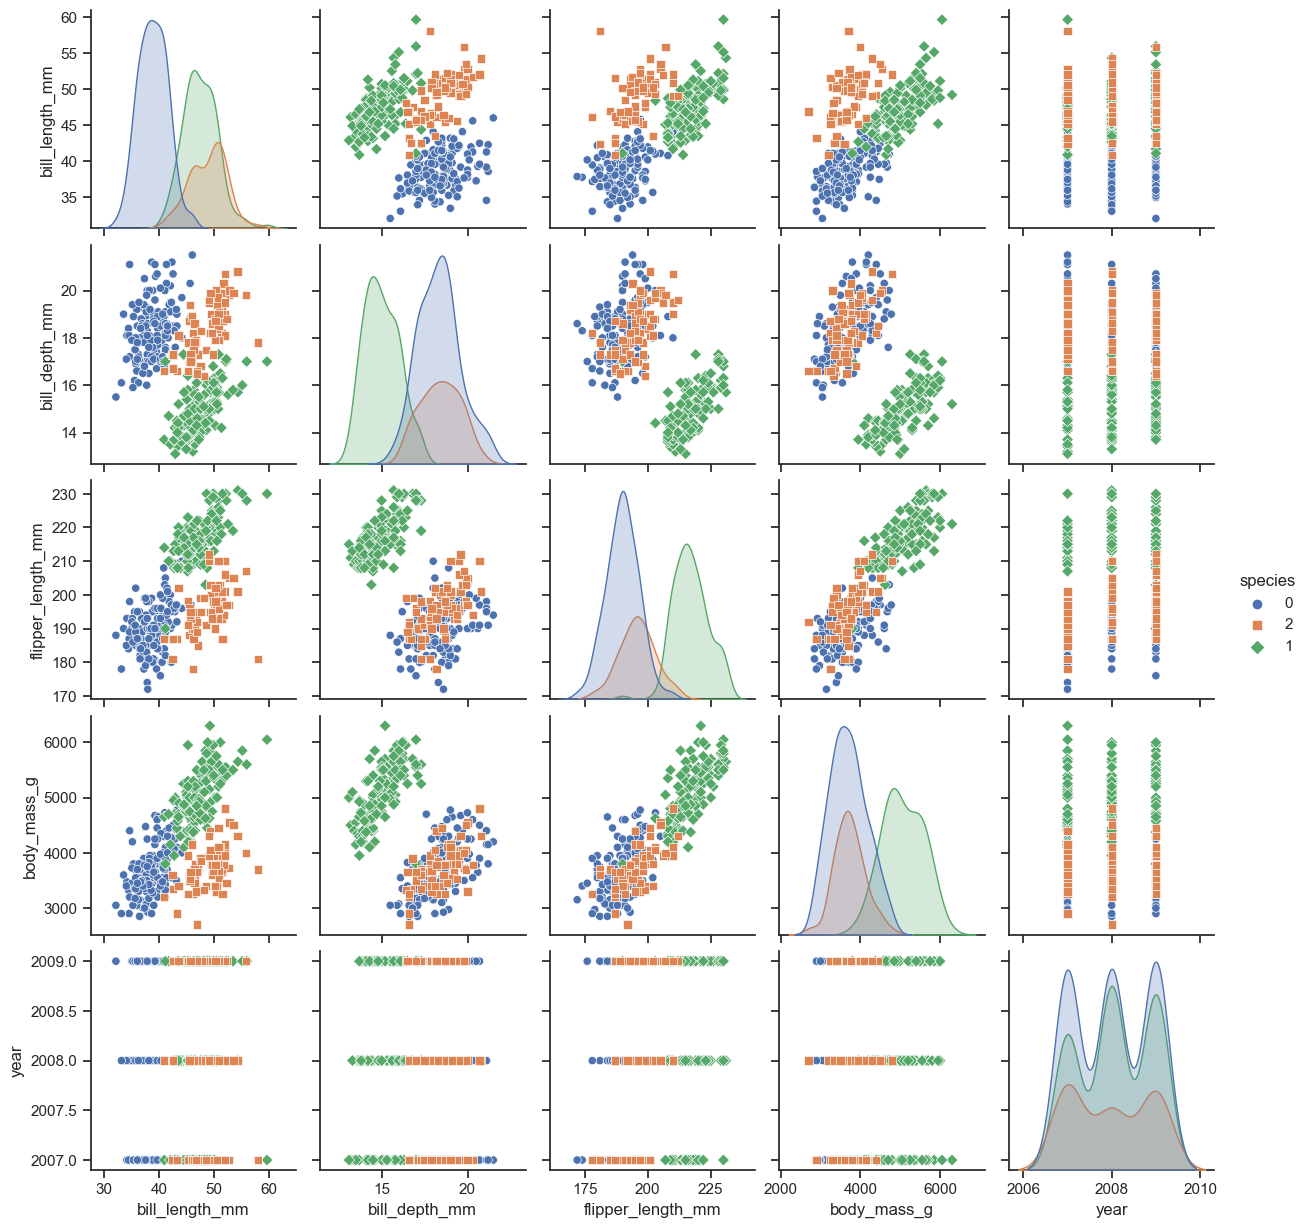

In [19]:
# Pair plot
sns.set(style="ticks")
sns.pairplot(f_data, hue="species", markers=["o", "s", "D"])
plt.show()

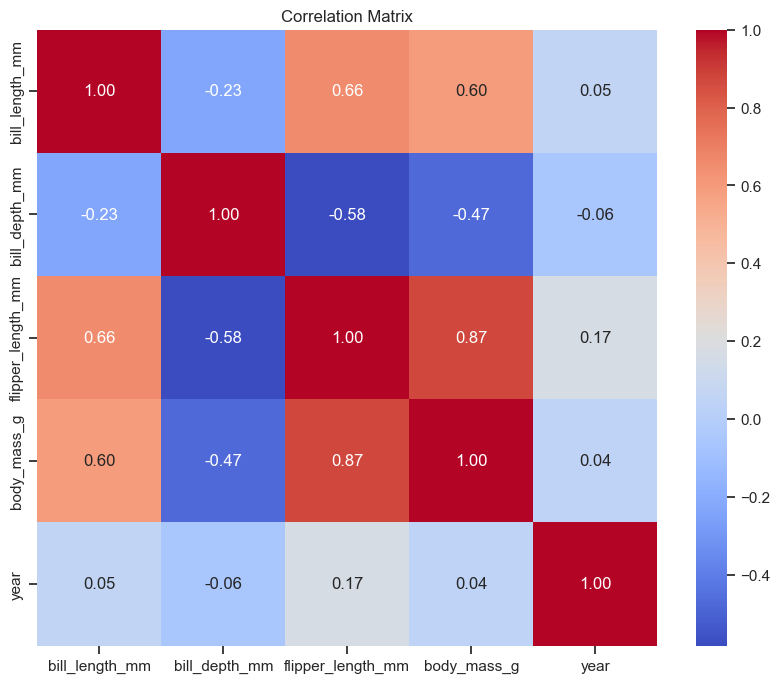

In [20]:
# Presenting correlation heat map
plt.figure(figsize=(10, 8))
correlation_matrix = f_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Reading the files and preprocess the file
f_diadata = pd.read_csv("diamonds.csv")
print(f_diadata)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [23]:
# Determine the sum of missing entries
m_sum = f_diadata.isnull().sum()
print("Sum of missing entries from each column:")
print(m_sum)

Sum of missing entries from each column:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [78]:
# Missing value fill up in each column
f_diadata = f_diadata.fillna(f_diadata.mode().iloc[0])
print(f_diadata)

       Unnamed: 0  carat cut color  clarity  depth  table  price     x     y  \
0               1   0.23   0     1      2.0   61.5   55.0    326  3.95  3.98   
1               2   0.21   1     1      0.0   59.8   61.0    326  3.89  3.84   
2               3   0.23   3     1      3.0   56.9   65.0    327  4.05  4.07   
3               4   0.29   1     5      1.0   62.4   58.0    334  4.20  4.23   
4               5   0.31   3     6      2.0   63.3   58.0    335  4.34  4.35   
...           ...    ...  ..   ...      ...    ...    ...    ...   ...   ...   
53935       53936   0.72   0     4      0.0   60.8   57.0   2757  5.75  5.76   
53936       53937   0.72   3     4      0.0   63.1   55.0   2757  5.69  5.75   
53937       53938   0.70   2     4      0.0   62.8   60.0   2757  5.66  5.68   
53938       53939   0.86   1     3      2.0   61.0   58.0   2757  6.15  6.12   
53939       53940   0.75   0     4      2.0   62.2   55.0   2757  5.83  5.87   

          z  
0      2.43  
1      2.31

In [26]:
# Showing statistics for the numeric column
print(f_diadata.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [29]:
# Presenting first 10 rows 
print(f_diadata.head(10))

   Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8           9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9          10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75  
5  3.96  2.48  
6  3.98  2.47  
7  4.11  2.53  
8  3.78  2.49  
9  

In [30]:
#Dimension of data r*c
n_rows, n_columns = f_diadata.shape
print(f"Number of rows: {n_rows}, Number of columns: {n_columns}")

Number of rows: 53940, Number of columns: 11


In [53]:
# Presenting the value counts in "cut", "color", "clarity" column 
print(f_diadata['cut'].value_counts())
print(f_diadata['color'].value_counts())
print(f_diadata['clarity'].value_counts())

0    21551
1    13791
2    12082
3     4906
4     1610
Name: cut, dtype: int64
0    11292
1     9797
2     9542
3     8304
4     6775
5     5422
6     2808
Name: color, dtype: int64
0.0    13065
1.0    12258
2.0     9194
3.0     8171
4.0     5066
5.0     1790
6.0      741
Name: clarity, dtype: int64


In [33]:
# Dataset information 
dia_data_info = f_diadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [34]:
# Columns converted to categorical
categorical_columns = ['cut', 'color', 'clarity']
f_diadata[categorical_columns] = f_diadata[categorical_columns].astype('category')

In [36]:
# Categorical

cut = {'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4}
color = {'G': 0, 'E': 1, 'F': 2, 'H': 3, 'D': 4, 'I': 5, 'J': 6}
clarity = {'SI1': 0, 'VS2': 1, 'SI2': 2, 'VS1': 3, 'VVS2': 4, 'IF': 5, 'I1': 6}

f_diadata['cut'] = f_diadata['cut'].map(cut)
f_diadata['color'] = f_diadata['color'].map(color)
f_diadata['clarity'] = f_diadata['clarity'].map(clarity)

In [38]:
print(f_diadata.color)

0        1
1        1
2        1
3        5
4        6
        ..
53935    4
53936    4
53937    4
53938    3
53939    4
Name: color, Length: 53940, dtype: category
Categories (7, int64): [4, 1, 2, 0, 3, 5, 6]


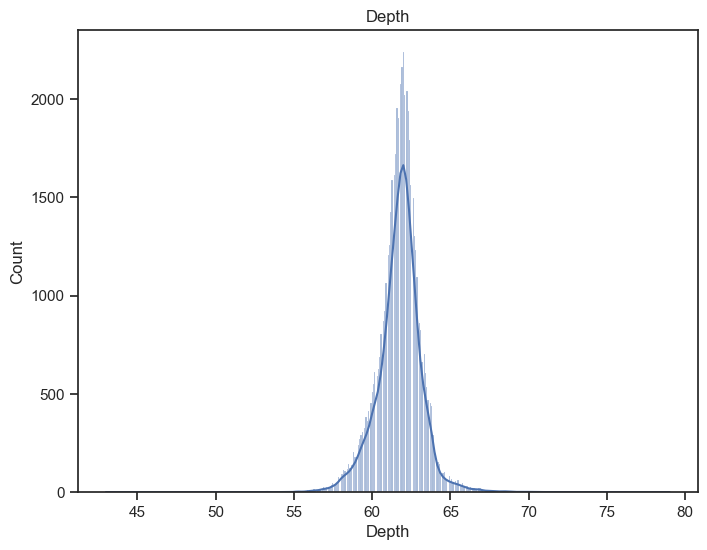

In [40]:

plt.figure(figsize=(8, 6))
sns.histplot(f_diadata['depth'], kde=True)
plt.title('Depth')
plt.xlabel('Depth')
plt.ylabel('Count')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


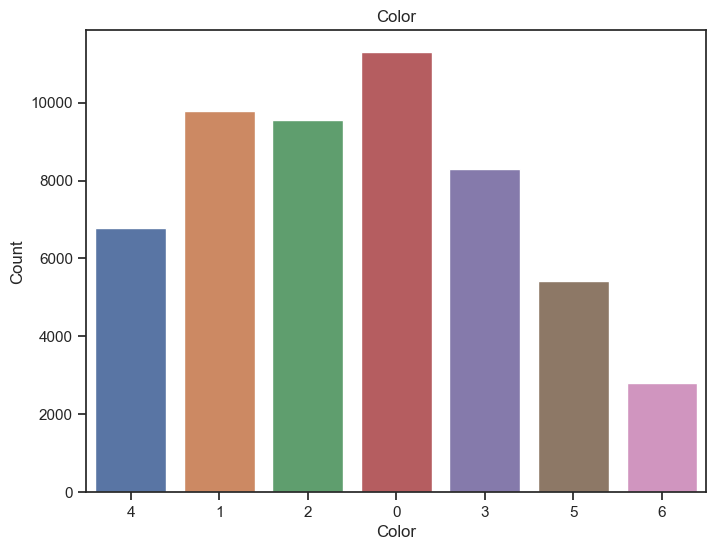

In [41]:
# Presenting bar plot for color
plt.figure(figsize=(8, 6))
sns.countplot(f_diadata['color'])
plt.title('Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

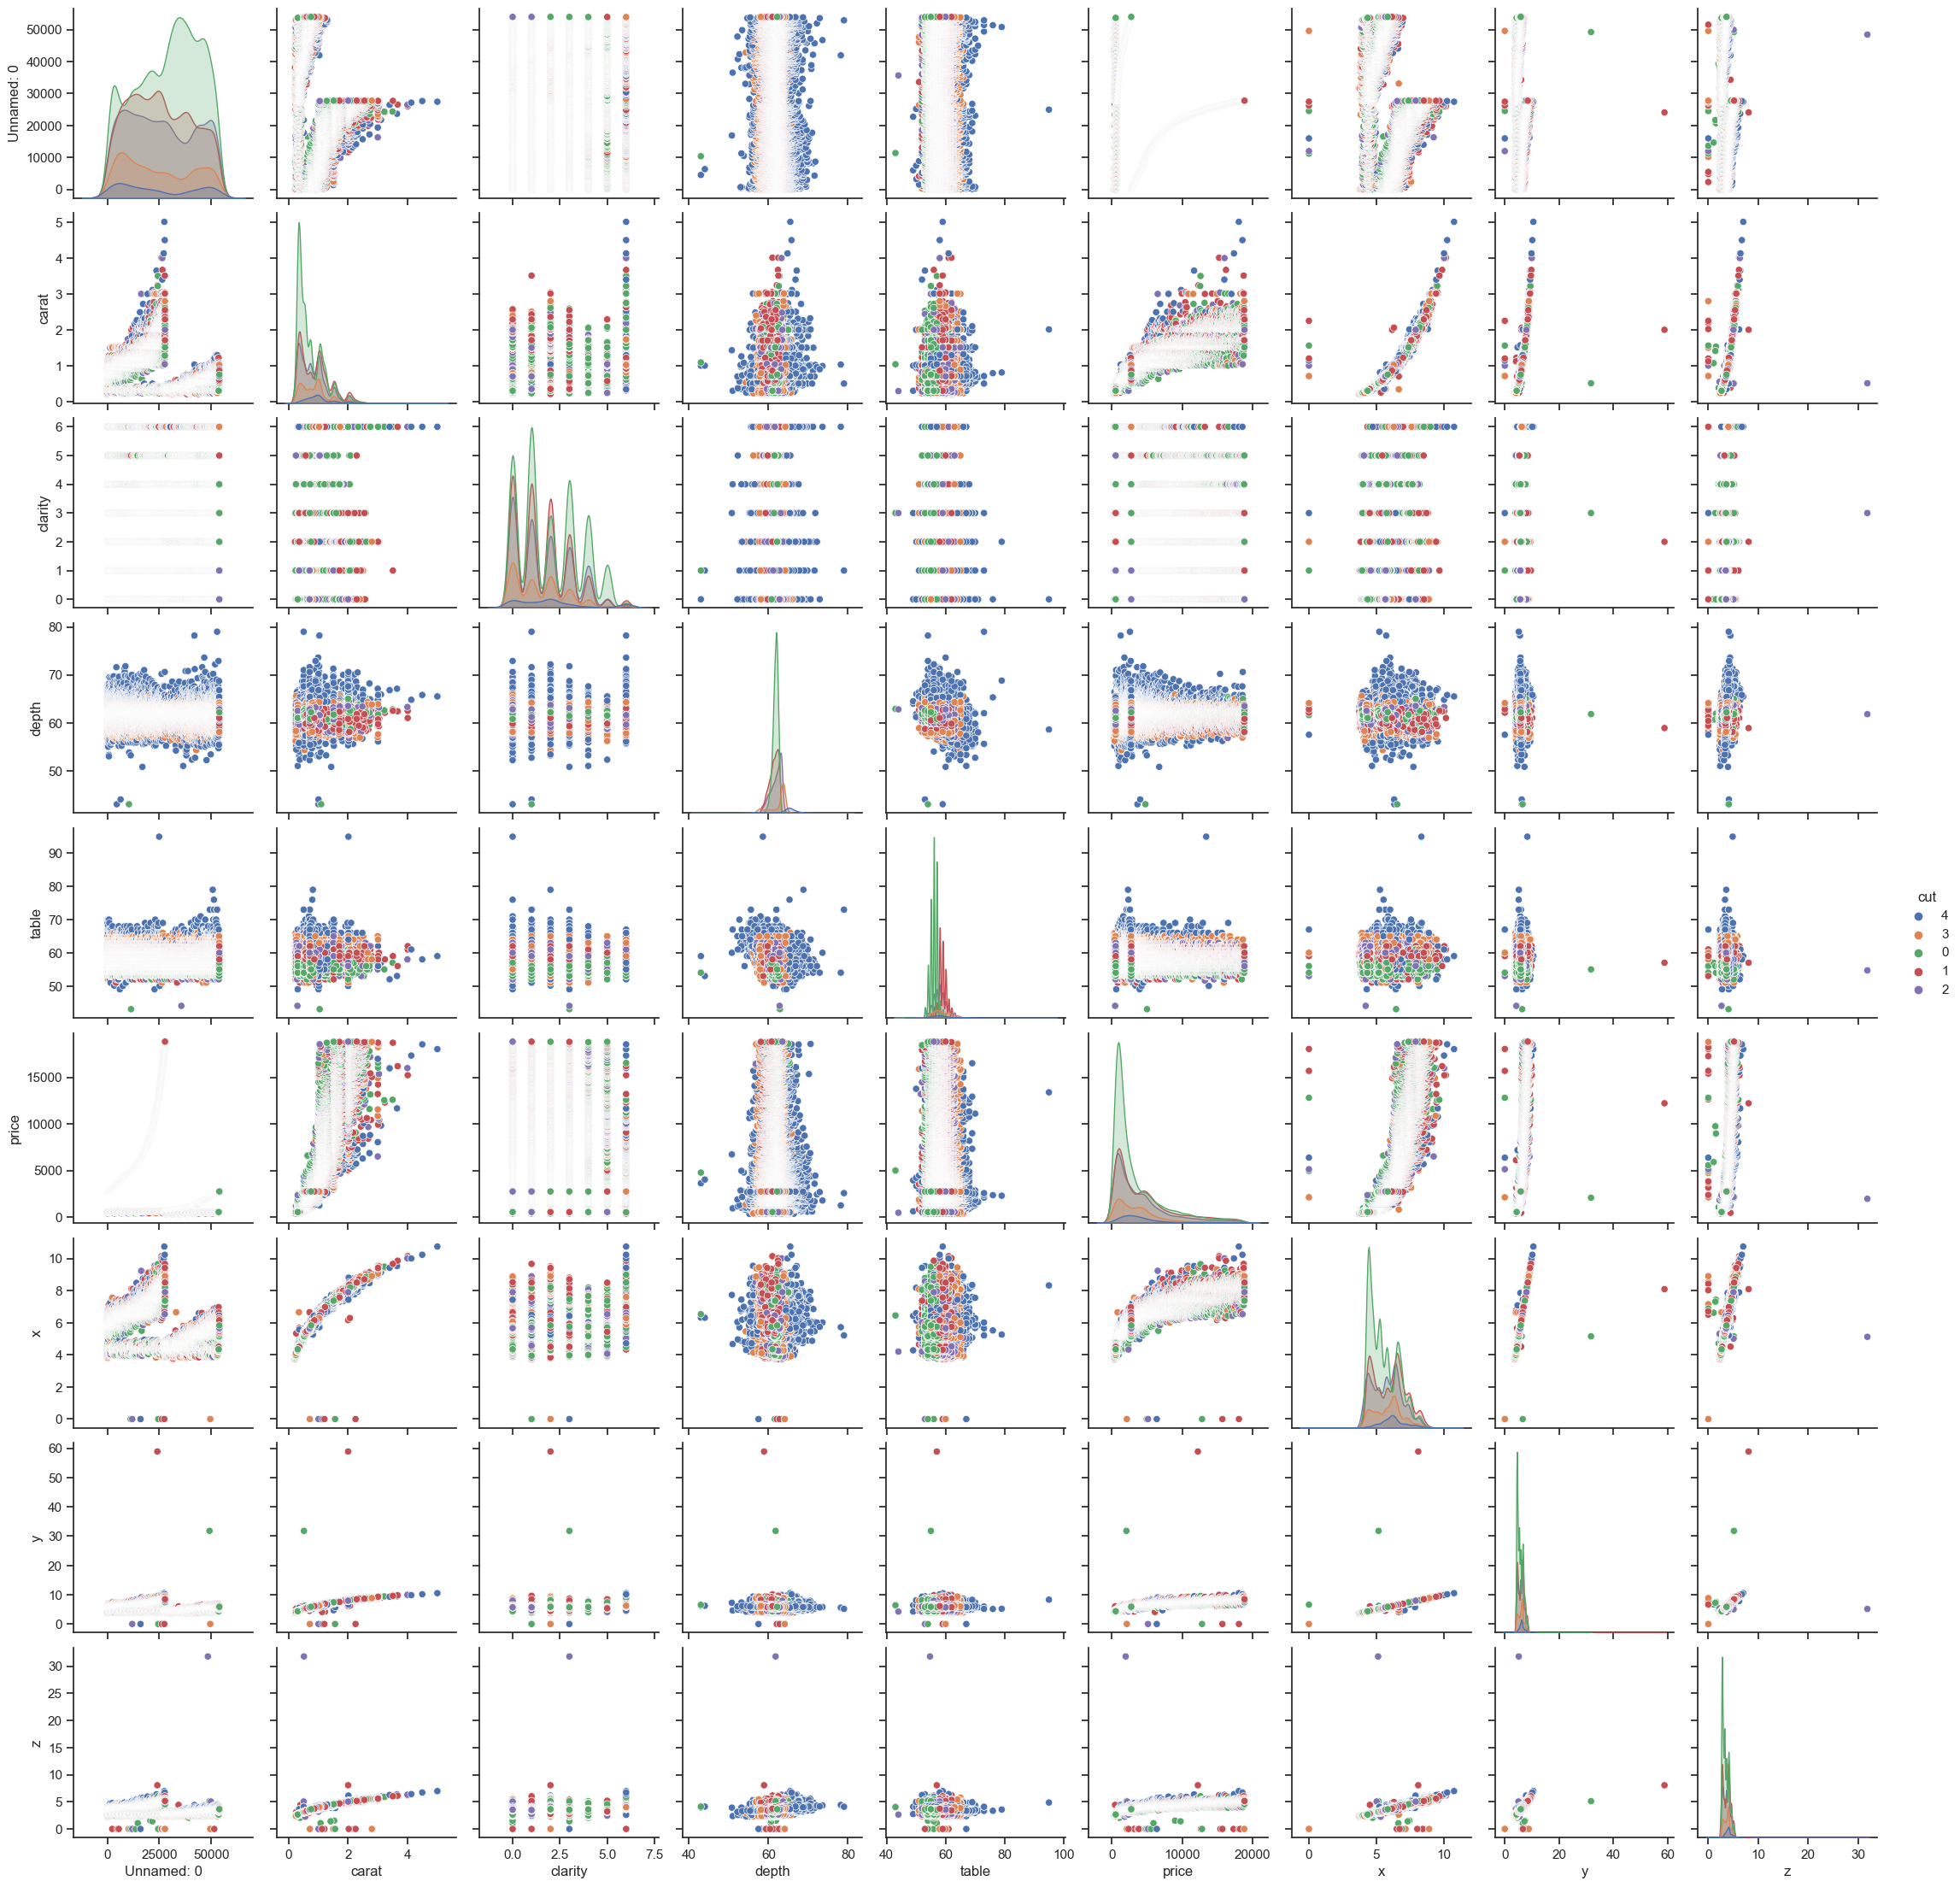

In [42]:
# Pair plot
sns.set(style="ticks")
sns.pairplot(f_diadata, hue="cut")
plt.show()

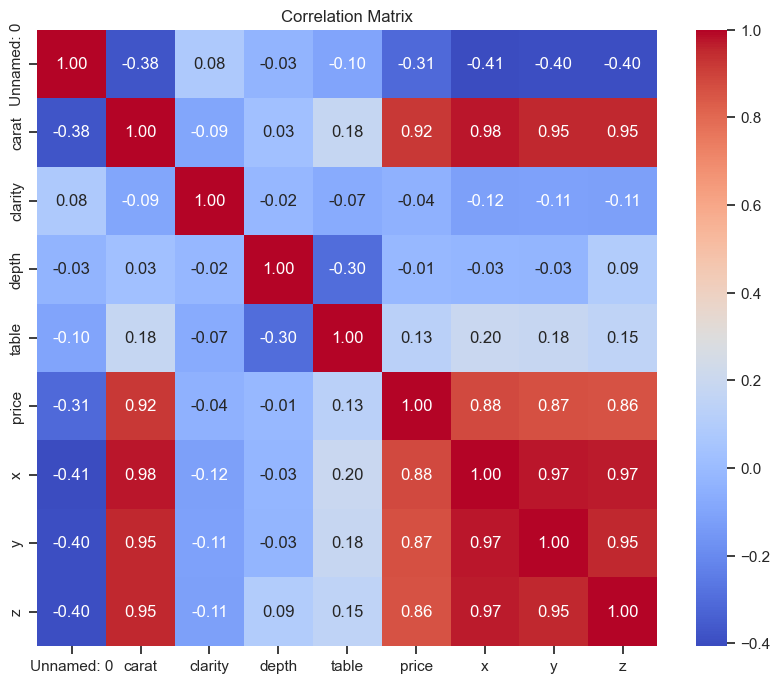

In [43]:
# Presenting correlation heat map
plt.figure(figsize=(10, 8))
correlation_matrix = f_diadata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [44]:
# Reading the files and preprocess the file
f_insdata = pd.read_csv("insurance.csv")
print(f_insdata)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [46]:
f_insdata = f_insdata.dropna().reset_index(drop=True)

In [47]:
# Duplicate data
duplicate_rows = f_insdata[f_insdata.duplicated(keep='first')]
duplicate_rows

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [48]:
f_insdata = f_insdata.drop_duplicates(keep='first')

In [50]:
# Showing statistics for the numeric column
print(f_insdata.describe())

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


In [51]:
# Presenting first 10 rows 
print(f_insdata.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [52]:
#Dimension of data r*c
n_rows, n_columns = f_insdata.shape
print(f"Number of rows: {n_rows}, Number of columns: {n_columns}")

Number of rows: 1337, Number of columns: 7


In [54]:
# Presenting the value counts in "sex","smoker", "region" column 
print(f_insdata['sex'].value_counts())
print(f_insdata['smoker'].value_counts())
print(f_insdata['region'].value_counts())

male      675
female    662
Name: sex, dtype: int64
no     1063
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


In [55]:
# Dataset information 
ins_data_info = f_insdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [71]:
# Columns converted to categorical
categorical_columns = ['sex', 'smoker', 'region']
f_insdata[categorical_columns] = f_insdata[categorical_columns].astype('category')


In [72]:
# Categorical

sex = {'male': 0, 'female': 1}
smoker = {'no': 0, 'yes': 1}
region = {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}

f_insdata['sex'] = f_insdata['sex'].map(sex)
f_insdata['smoker'] = f_insdata['smoker'].map(smoker)
f_insdata['region'] = f_insdata['region'].map(region)

In [73]:
print(f_insdata.region)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1333   NaN
1334   NaN
1335   NaN
1336   NaN
1337   NaN
Name: region, Length: 1337, dtype: category
Categories (0, float64): []


C:\Users\User\AppData\Local\Temp\ipykernel_904\1830952529.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(f_insdata.region)


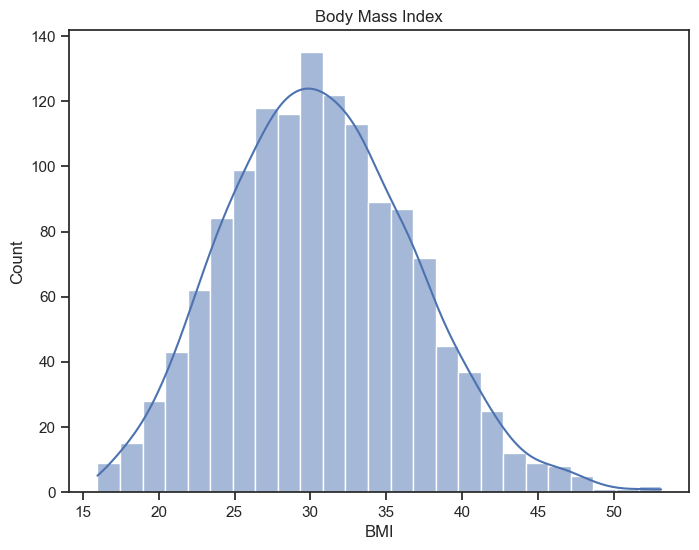

In [64]:
plt.figure(figsize=(8, 6))
sns.histplot(f_insdata['bmi'], kde=True)
plt.title('Body Mass Index')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


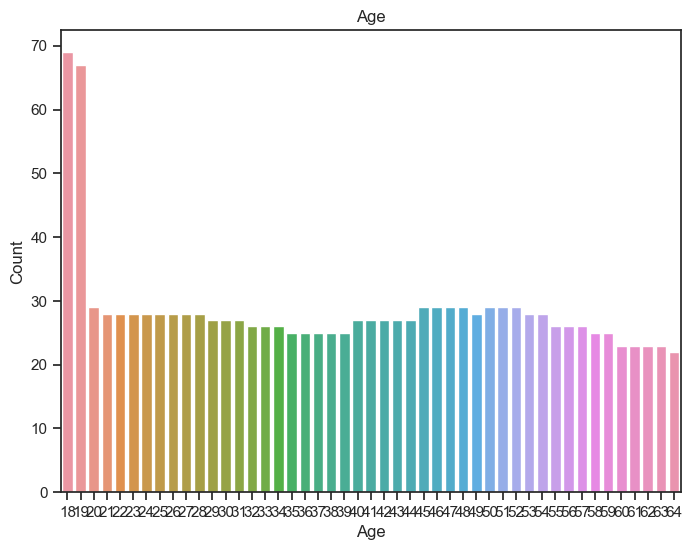

In [65]:
# Presenting bar plot for age
plt.figure(figsize=(8, 6))
sns.countplot(f_insdata['age'])
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

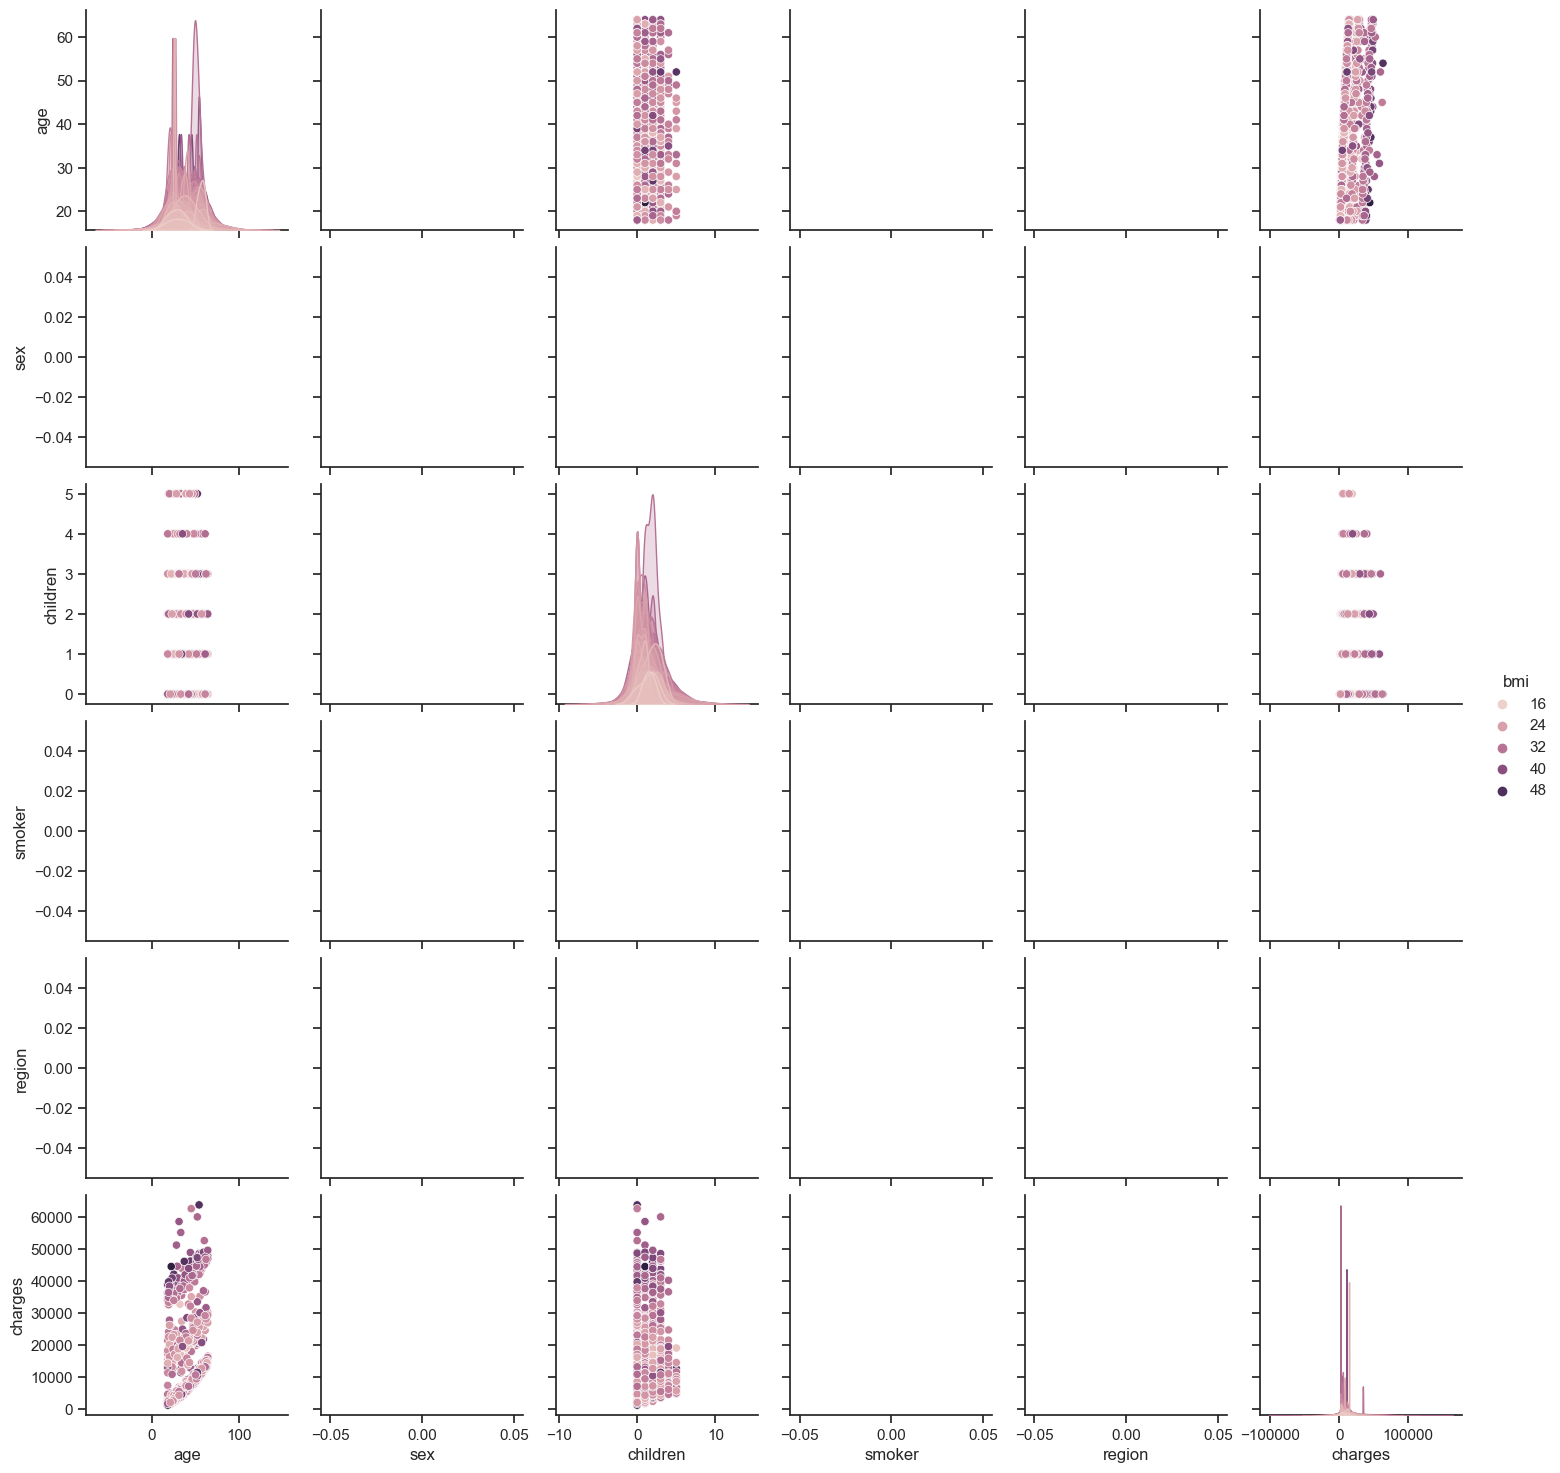

In [66]:
# Pair plot
sns.set(style="ticks")
sns.pairplot(f_insdata, hue="bmi")
plt.show()

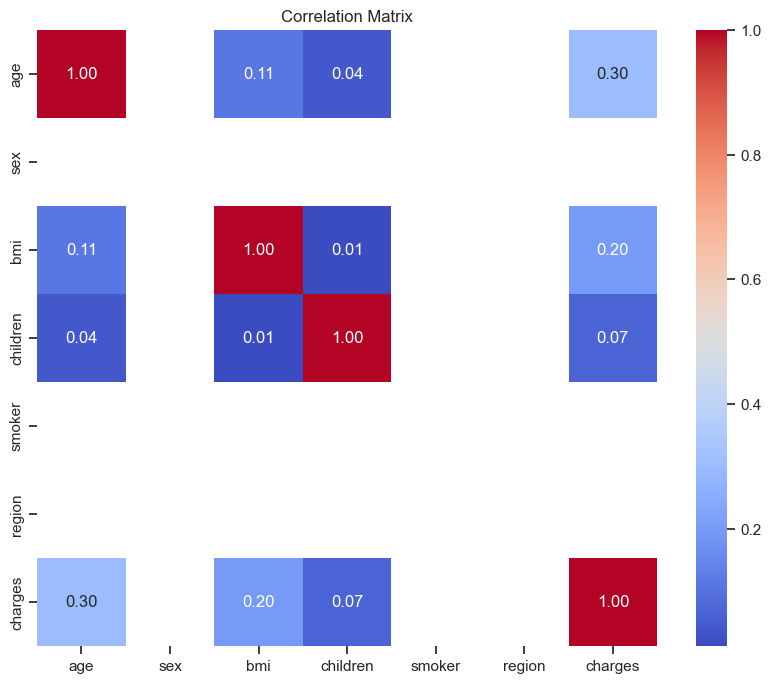

In [67]:
# Presenting correlation heat map
plt.figure(figsize=(10, 8))
correlation_matrix = f_insdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

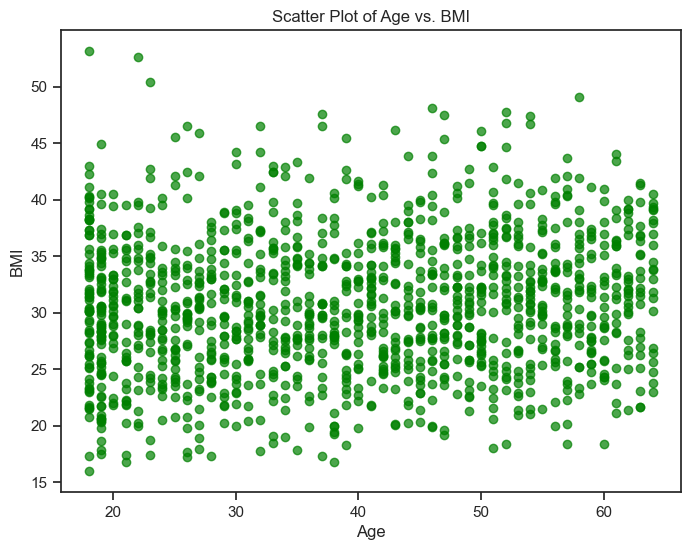

In [75]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(f_insdata['age'], f_insdata['bmi'], color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs. BMI')
plt.show()